# Monty Hall
   

In [2]:
import numpy as np
from random import randint 
from enum import Enum
portes = np.array([1,2,3])
#print(portes)

portes = np.delete(portes,portes[randint(0,1)])

#portes = [1]
print(portes)



[1 2]


In [40]:
r =( 1 == 2)
r

False

In [29]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [0]

a = np.delete(a,[0])

In [24]:
a

array([2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [92]:

def play(strategie,nb_tours):
    '''Simule une partie du jeu Monty Hall.
        avec numpy arry comme list
        reproduit nb_tours x
    '''
    lg = np.array([],dtype='i')
    
    for i in range(nb_tours):
    
        portes = np.array([1,2,3]) 
        bonne_porte = randint(0,2)
        # Choix du joueur
        premier_choix = randint(0,2)
        np.delete(portes,premier_choix)
         # Le présentateur élimine une porte
        if premier_choix == bonne_porte:
            np.delete(portes, portes[randint(0,1)])
        else:
            portes = [bonne_porte]
        deuxieme_choix = 0
        # Le deuxieme choix depend de la strategie
        if strategie == Strategie.CHANGER:
            deuxieme_choix = portes[0]
        elif strategie == Strategie.GARDER:
            deuxieme_choix = premier_choix
        else:
            raise ValueError("Stratégie non reconnue!")
        
        np.append( lg,deuxieme_choix == bonne_porte)
    return lg

In [94]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))

En changeant de porte, le joueur a gagné 0 sur 10000 parties.


In [63]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [106]:
N_TRIALS = 1000
prizes = np.random.randint(0,3, size=(N_TRIALS)) # Attention, 3
# pour numpy, et non pas 2

first_choices = np.random.randint(0,3, size=(N_TRIALS))

# Si le joueur change de porte, il ne gagne que si son
# premier choix n'était pas le bon
switching_player_gains = (prizes!=first_choices).astype(int)
keeping_player_gains = (prizes==first_choices).astype(int)


670 330


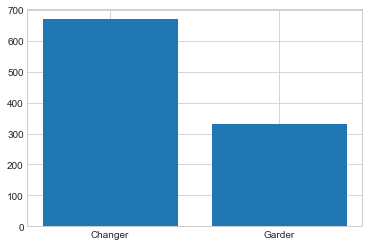

In [107]:
sw_sum=switching_player_gains.sum()
sw_keep=keeping_player_gains.sum()
print (sw_sum, sw_keep)
plot = plt.bar([1,2],[sw_sum,sw_keep],tick_label=["Changer","Garder"])


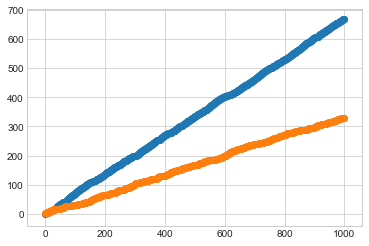

In [108]:
figure = plt.figure()
plot = plt.scatter(range(N_TRIALS), switching_player_gains.cumsum())
plot = plt.scatter(range(N_TRIALS), keeping_player_gains.cumsum())